### Importing libraries

In [41]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
import nltk
from nltk.corpus import stopwords
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import warnings
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import numpy as np 
import pandas as pd
import string
import re
from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
from collections import Counter,OrderedDict
from gensim import models,corpora
from gensim.summarization import summarize,keywords
import warnings
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim
import gensim.models.phrases as gen
from gensim.models.coherencemodel import CoherenceModel

### Loading data

In [42]:
data=pd.read_csv('articles.csv')

In [43]:
len(data)

337

In [44]:
data.head(10)

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...
5,Irhum Shafkat,2K,15,https://towardsdatascience.com/intuitively-und...,Intuitively Understanding Convolutions for Dee...,The advent of powerful and versatile deep lear...
6,Sam Drozdov,2.3K,6,https://uxdesign.cc/an-intro-to-machine-learni...,An intro to Machine Learning for designers – U...,There is an ongoing debate about whether or no...
7,Conor Dewey,252,10,https://towardsdatascience.com/the-big-list-of...,The Big List of DS/ML Interview Resources – To...,Data science interviews certainly aren’t easy....
8,Abhishek Parbhakar,937,6,https://towardsdatascience.com/must-know-infor...,Must know Information Theory concepts in Deep ...,Information theory is an important field that ...
9,Aman Dalmia,2.3K,17,https://blog.usejournal.com/what-i-learned-fro...,What I learned from interviewing at multiple A...,"Over the past 8 months, I’ve been interviewing..."


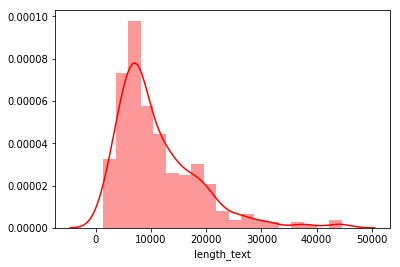

In [45]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

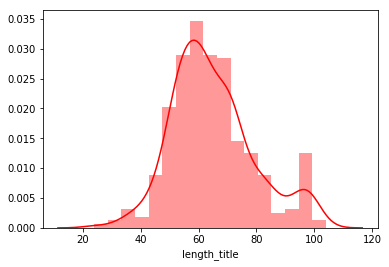

In [46]:
data['length_title'] = data['title'].str.len()
sns.distplot(data['length_title'], color="r")
plt.show()

In [47]:
titles = [x for x in data['title']]

In [48]:
docs = [x for x in data['text']]

In [49]:
new_list_1=[]
for y in docs:
    
    new_list_1.append(y.split(' '))
        

In [51]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"])

### Pre-processing

In [52]:
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

In [53]:
docs = [words(x) for x in data['text']]

In [54]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 18838
Number of unique words after removing rare and common words: 2671


In [55]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [56]:
num_topics = 10
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1 
temp = dictionary[0] 
id2word = dictionary.id2token
model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, num_topics=num_topics, passes=passes, eval_every=eval_every)

## Topic Modeling using LDA

In [57]:
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [59]:
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      16.943621        1       1 -0.004686  0.002003
6      16.876087        1       2 -0.062892  0.038492
3      11.715220        1       3 -0.102634  0.112138
0      11.643633        1       4 -0.018193  0.055072
4      10.689369        1       5 -0.127193  0.083113
8       9.555069        1       6  0.004293 -0.032497
9       7.054553        1       7 -0.039209 -0.274075
5       5.490191        1       8  0.320566  0.044899
1       5.208360        1       9  0.004670 -0.060646
7       4.823901        1      10  0.025276  0.031502, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
717   Default  441.000000          cnn  441.000000  30.0000  30.0000
635   Default  386.000000       neuron  386.000000  29.0000  29.0000
1820  Default  233.000000         star  233.000000  28.0000  28.0000
386   Default  229.000000       review  229.000000  27.0000  27.0000
1981  Default  190.000000       rating  190.000000  26.0000  26.0000
802   Default  227.000000       policy  227.000000  25.0000  25.0000
1378  Default  168.000000          cpu  168.000000  24.0000  24.0000
24    Default  294.000000          bot  294.000000  23.0000  23.0000
1419  Default  152.000000        sheet  152.000000  22.0000  22.0000
1674  Default  137.000000          gtx  137.000000  21.0000  21.0000
1395  Default  147.000000          gpu  147.000000  20.0000  20.0000
1035  Default  132.000000         card  132.000000  19.0000  19.0000
1019  Default  163.000000     weighted  163.000000  18.0000  18.0000
349   Default  150.000000    interview  150.000000  17.0000  17.0000
19    Default  255.000000      average  255.000000  16.0000  16.0000
975   Default  299.000000        pixel  299.000000  15.0000  15.0000
1426  Default  185.000000   university  185.000000  14.0000  14.0000
2528  Default  113.000000         gpus  113.000000  13.0000  13.0000
819   Default  154.000000       reward  154.000000  12.0000  12.0000
1704  Default  104.000000           ti  104.000000  11.0000  11.0000
359   Default  268.000000       matrix  268.000000  10.0000  10.0000
397   Default  184.000000        sound  184.000000   9.0000   9.0000
375   Default  192.000000  programming  192.000000   8.0000   8.0000
2665  Default   97.000000           en   97.000000   7.0000   7.0000
695   Default  218.000000   activation  218.000000   6.0000   6.0000
2310  Default  133.000000          men  133.000000   5.0000   5.0000
2382  Default  167.000000       region  167.000000   4.0000   4.0000
25    Default  300.000000          box  300.000000   3.0000   3.0000
2621  Default  141.000000         move  141.000000   2.0000   2.0000
700   Default  193.000000        agent  193.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
1590  Topic10   18.760792         city   29.522148   2.5782  -5.6663
1452  Topic10   19.308479   collective   32.473835   2.5117  -5.6375
2483  Topic10   67.817406           et  114.915771   2.5042  -4.3813
1976  Topic10    6.573608      premium   11.274178   2.4921  -6.7150
2184  Topic10   24.188812       travel   42.010086   2.4796  -5.4122
316   Topic10   16.914207        crazy   30.265404   2.4497  -5.7699
420   Topic10   65.773682          www  120.867111   2.4231  -4.4119
1632  Topic10   49.054100       scikit   90.375778   2.4205  -4.7051
458   Topic10   23.191555   dictionary   42.768475   2.4196  -5.4543
1962  Topic10   15.755582       matlab   29.127632   2.4171  -5.8409
912   Topic10   35.186687     distance   66.612953   2.3934  -5.0374
1800  Topic10    5.462118       island   10.444937   2.3833  -6.9002
2646  Topic10    5.379525       usable   10.514717   2.3614  -6.9155
2651  Topic10   16.012192           dr   31.643688   2.3504  -5.8247
2644  Topic10    8.114260    organized   16.331606   2.3321  -6.50

## Topic Modeling using NMF

In [20]:
data_text = data[['text']]

In [21]:
data_text = data_text.astype('str')

In [22]:
for idx in range(len(data_text)):
    data_text.iloc[idx]['text'] = [word for word in data_text.iloc[idx]['text'].split(' ') if word not in stopwords.words()]

In [23]:
articles = [value[0] for value in data_text.iloc[0:].values]

In [24]:
articles_sentences = [' '.join(text) for text in articles]

In [25]:
# obtain a Counts design matrix
vectorizer = CountVectorizer(analyzer='word', max_features=1000);
x_counts = vectorizer.fit_transform(articles_sentences);

In [26]:
# set a TfIdf transformer, and transfer the counts with the model.
transformer = TfidfTransformer()
x_tfidf = transformer.fit_transform(x_counts);

In [27]:
#normalize the TfIdf values
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [28]:
num_topics = 10

In [29]:
model = NMF(n_components=num_topics, init='nndsvd');

In [30]:
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=10, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [31]:
## Get words from each topic 
def get_nmf_topics(model, n_top_words):
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    word_dict = {};
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict);

In [32]:
get_nmf_topics(model, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,it,learning,cheat,network,cnn,stars,models,intelligence,distribution,table
1,the,deep,sheet,neural,image,github,facebook,re,information,action
2,ai,fast,https,layer,region,python,data,machines,probability,reward
3,people,ai,datacamp,training,bounding,source,machine,pre,experiment,policy
4,you,machine,numpy,the,boxes,library,learning,me,random,actions
5,like,natural,www,model,object,projects,big,intelligent,variables,state
6,we,50,com,output,faster,open,story,part,data,learning
7,human,https,scikit,neuron,pixel,tensorflow,show,car,theory,environment
8,one,vector,python,function,cnns,framework,from,artificial,measure,network
9,and,supervised,community,this,objects,google,clap,question,defined,agent


## Recommendation

In [37]:
words_list=list(chain.from_iterable(docs))

In [38]:
# Cosine similarity
def cosine_sim(text1, text2):
    tfidf_score = TfidfVectorizer().fit_transform([text1, text2])
    return ((tfidf_score * tfidf_score.T).A)[0, 1]

# Most similar article
def closest_doc_name(sentence, docs):
    cos = []
    for i in range(len(docs)):
        cos.append(cosine_sim(', '.join(sentence.split(' ')),', '.join(docs[i])))
    return [titles[x] for x in np.argsort(cos)[-10:][::-1]]

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=words, stop_words=ENGLISH_STOP_WORDS).\
                        fit(words_list)




In [40]:
closest_doc_name('RNN', docs)

['Obama-RNN — Machine generated political speeches. – samim – Medium',
 'The fall of RNN / LSTM – Towards Data Science',
 'The fall of RNN / LSTM – Towards Data Science',
 'Continuous video classification with TensorFlow, Inception and Recurrent Nets',
 'How to build a Recurrent Neural Network in TensorFlow (1/7)',
 'Multi-Stream RNN, Concat RNN, Internal Conv RNN, Lag 2 RNN in Tensorflow',
 'Adventures in Narrated Reality – Artists and Machine Intelligence – Medium',
 'Beethoven, Picasso, and Artificial Intelligence – Towards Data Science',
 'Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences',
 'Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences']